In [1]:
from google.colab import files
uploaded = files.upload()

Saving supply_chain_data.csv to supply_chain_data.csv


In [49]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [4]:
Supply = pd.read_csv("supply_chain_data.csv")
Supply.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [6]:
print(Supply.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

Visualization

In [16]:
# Scatter plot
fig = px.scatter(Supply, x='Price',
                 y = 'Revenue generated',
                 color= 'Product type',
                 title = 'Number of products sold',
                 trendline = 'ols')
fig.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Mumbai')])

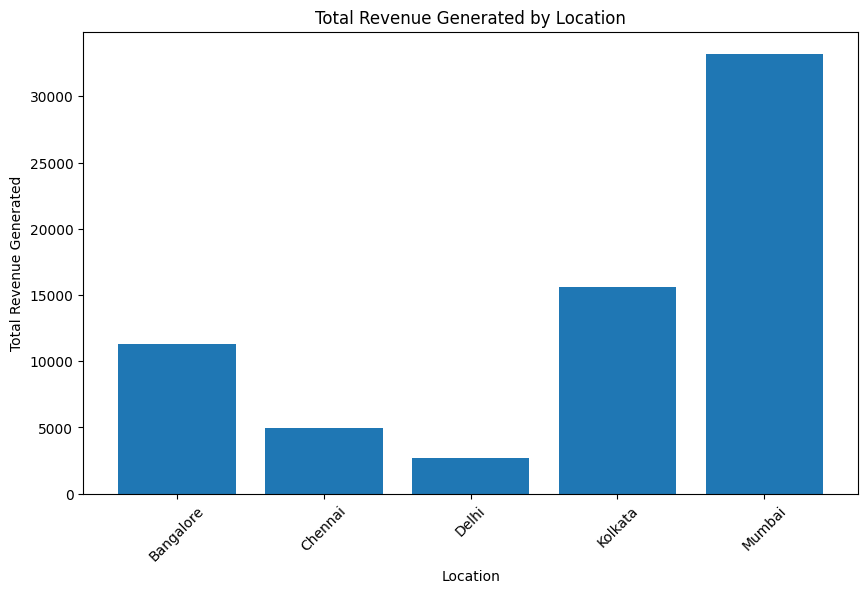

In [53]:
data = {
    "Location": ["Mumbai", "Mumbai", "Mumbai", "Kolkata", "Delhi", "Bangalore", "Kolkata", "Bangalore", "Mumbai", "Chennai"],
    "Revenue generated": [8661.996792, 7460.900065, 9577.749626, 7766.836426, 2686.505152, 2828.348746, 7823.476560, 8496.103813, 7517.363211, 4971.145988]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group the data by "Location" and calculate the total revenue generated
revenue_by_location = df.groupby("Location")["Revenue generated"].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_location["Location"], revenue_by_location["Revenue generated"])
plt.xlabel("Location")
plt.ylabel("Total Revenue Generated")
plt.title("Total Revenue Generated by Location")
plt.xticks(rotation=45)


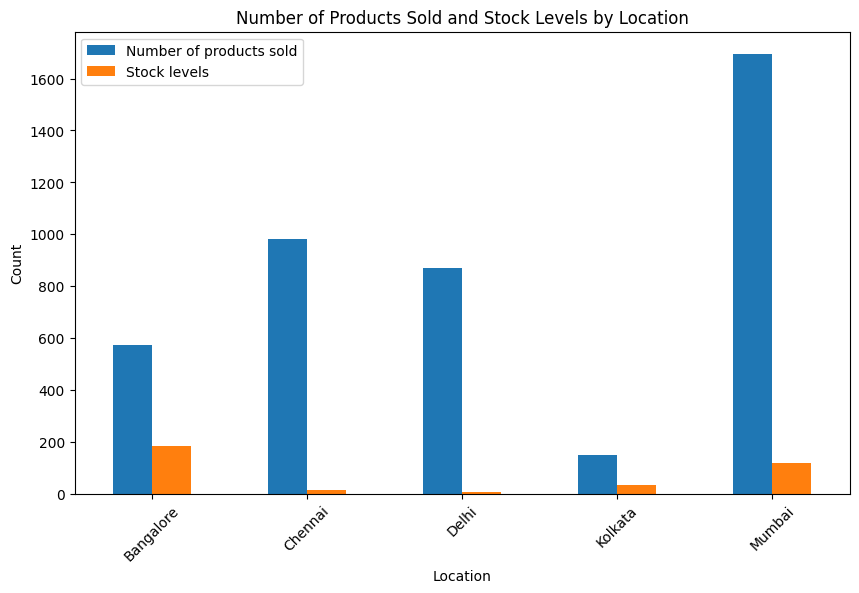

In [54]:
data = {
    "Location": ["Mumbai", "Mumbai", "Mumbai", "Kolkata", "Delhi", "Bangalore", "Kolkata", "Bangalore", "Mumbai", "Chennai"],
    "Number of products sold": [802, 736, 8, 83, 871, 147, 65, 426, 150, 980],
    "Stock levels": [58, 53, 1, 23, 5, 90, 11, 93, 5, 14]
}
df = pd.DataFrame(data)

# Group the data by "Location" and calculate the sum of "Number of products sold" and "Stock levels"
grouped_data = df.groupby("Location")[["Number of products sold", "Stock levels"]].sum()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind="bar", ax=ax)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Number of Products Sold and Stock Levels by Location")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(["Number of products sold", "Stock levels"])
plt.show()

In [17]:
# Pie chart
pie_chart = px.pie(Supply, values='Number of products sold', names = 'Product type',
                   title = 'Sales of the product',
                   hole = 0.5,
                   color_discrete_sequence = px.colors.qualitative.Pastel)
pie_chart.show()

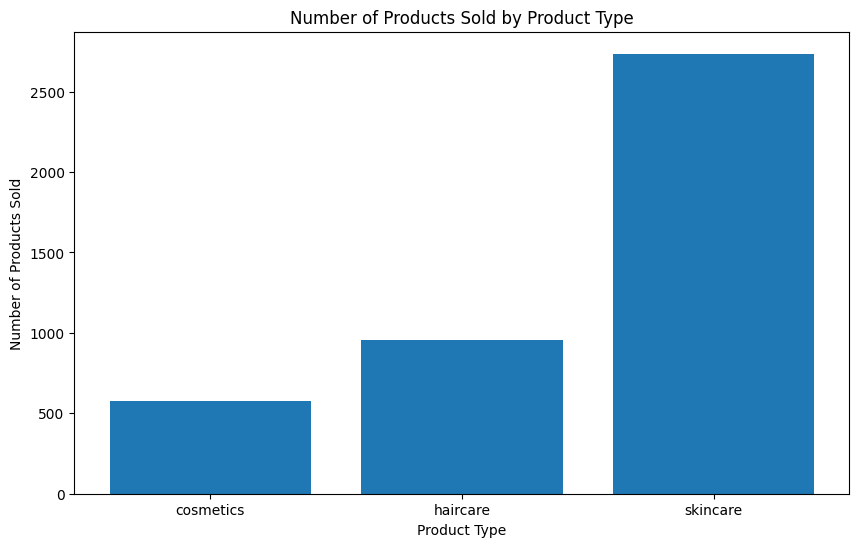

In [25]:
# Bar graph

data = {
    "Product type": ["haircare", "skincare", "haircare", "skincare", "skincare", "haircare", "skincare", "cosmetics", "cosmetics", "skincare"],
    "Number of products sold": [802, 736, 8, 83, 871, 147, 65, 426, 150, 980]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group the data by "Product type" and calculate the sum of "Number of products sold"
grouped = df.groupby("Product type")["Number of products sold"].sum().reset_index()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped["Product type"], grouped["Number of products sold"])
plt.xlabel("Product Type")
plt.ylabel("Number of Products Sold")
plt.title("Number of Products Sold by Product Type")
plt.show()

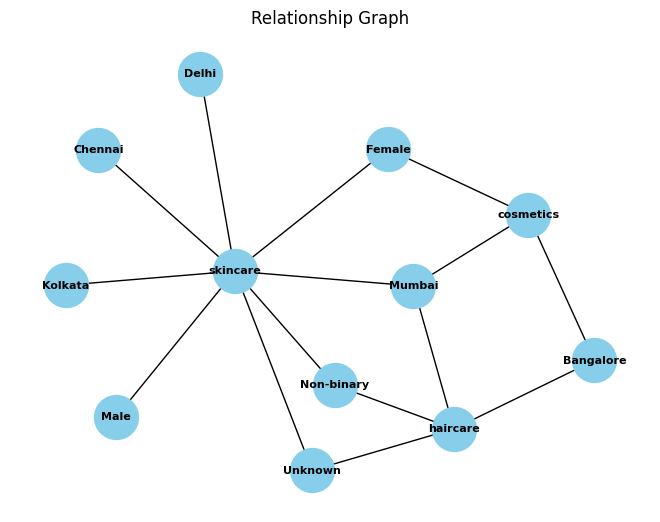

In [26]:
# Relation ship of graph

data = {
    "Product type": ["haircare", "skincare", "haircare", "skincare", "skincare", "haircare", "skincare", "cosmetics", "cosmetics", "skincare"],
    "Customer demographics": ["Non-binary", "Female", "Unknown", "Non-binary", "Non-binary", "Non-binary", "Male", "Female", "Female", "Unknown"],
    "Location": ["Mumbai", "Mumbai", "Mumbai", "Kolkata", "Delhi", "Bangalore", "Kolkata", "Bangalore", "Mumbai", "Chennai"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes for each unique value in the columns
for column in df.columns:
    for value in df[column].unique():
        G.add_node(value)

# Add edges based on relationships between columns
for i in range(len(df)):
    G.add_edge(df.loc[i, "Product type"], df.loc[i, "Customer demographics"])
    G.add_edge(df.loc[i, "Product type"], df.loc[i, "Location"])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
plt.title("Relationship Graph")
plt.show()

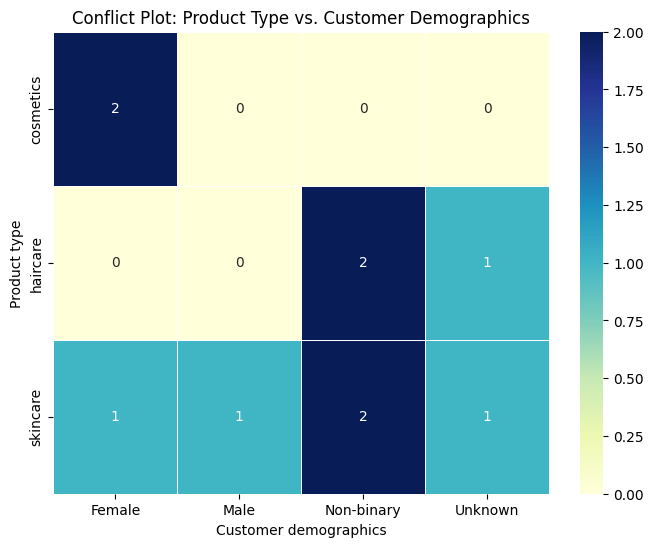

In [34]:
data = {
    "Product type": ["haircare", "skincare", "haircare", "skincare", "skincare", "haircare", "skincare", "cosmetics", "cosmetics", "skincare"],
    "Customer demographics": ["Non-binary", "Female", "Unknown", "Non-binary", "Non-binary", "Non-binary", "Male", "Female", "Female", "Unknown"]
}
df = pd.DataFrame(data)

# Create a conflict matrix
conflict_matrix = df.pivot_table(index='Product type', columns='Customer demographics', aggfunc=len, fill_value=0)

# Create the conflict plot
plt.figure(figsize=(8, 6))
sns.heatmap(conflict_matrix, annot=True, cmap="YlGnBu", linewidths=.5, fmt="d")
plt.title("Conflict Plot: Product Type vs. Customer Demographics")
plt.show()


In [42]:
Revenue_chart = px.line(Supply, x = 'SKU',
                        y = 'Revenue generated',
                        title = 'Revenue generation by SKU')
Revenue_chart.show()

In [43]:
Stock_chart = px.line(Supply, x = 'SKU',
                     y = 'Stock levels',
                      title = 'Stock levels by SKU')
Stock_chart.show()

In [44]:
Order_chart = px.bar(Supply, x = 'SKU',
                     y = 'Order quantities',
                     title = 'Order Quantity by SKU')
Order_chart.show()

In [47]:
shipping_chart = px.box(Supply, x = 'SKU',
                        y = 'Shipping costs',
                        title = 'Shipping coasts by Carrier')
shipping_chart.show()

In [51]:
transport_chart = px.pie(Supply,
                         values = 'Costs',
                         names = 'Transportation modes',
                         title = 'Cost Distrubution by Transportation',
                         hole = 0.5,
                         color_discrete_sequence = px.colors.qualitative.Pastel)
transport_chart.show()